In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [13]:
start = '2010-01-01'
end = '2024-01-01'

df = yf.download("AAPL", start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800


In [10]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [11]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


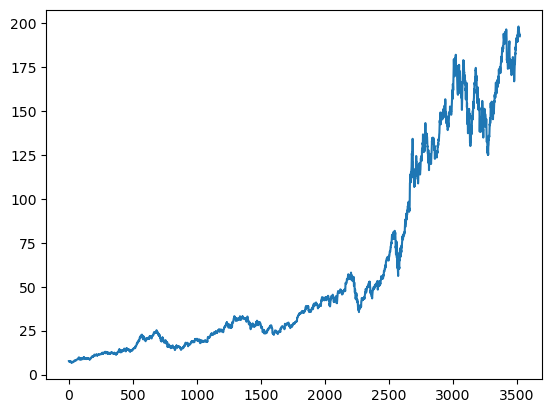

In [12]:
plt.plot(df.Close)

In [203]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [204]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

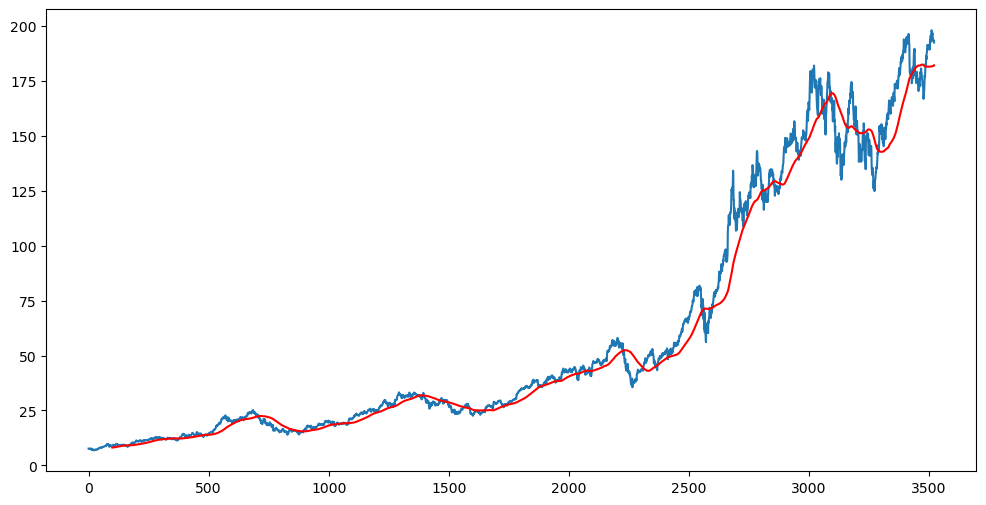

In [205]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [242]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

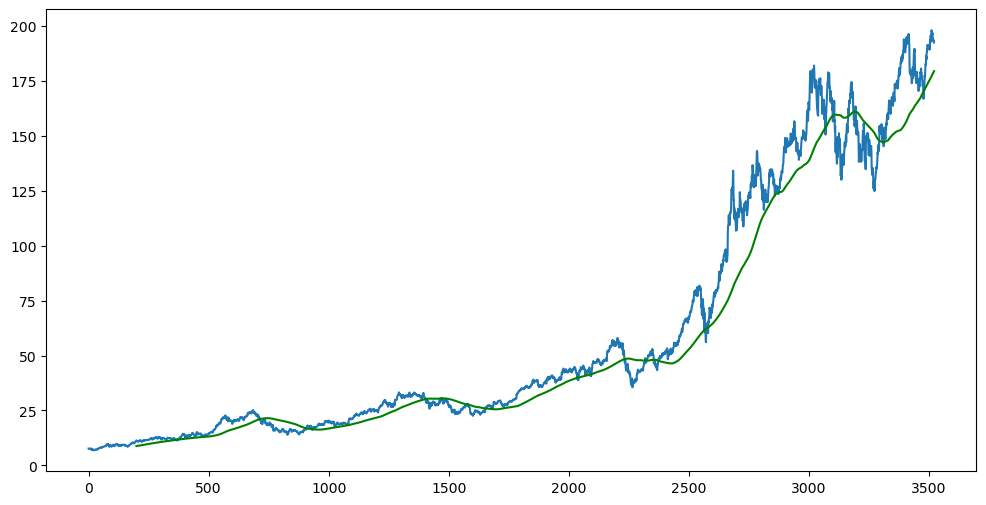

In [207]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma200, 'g')

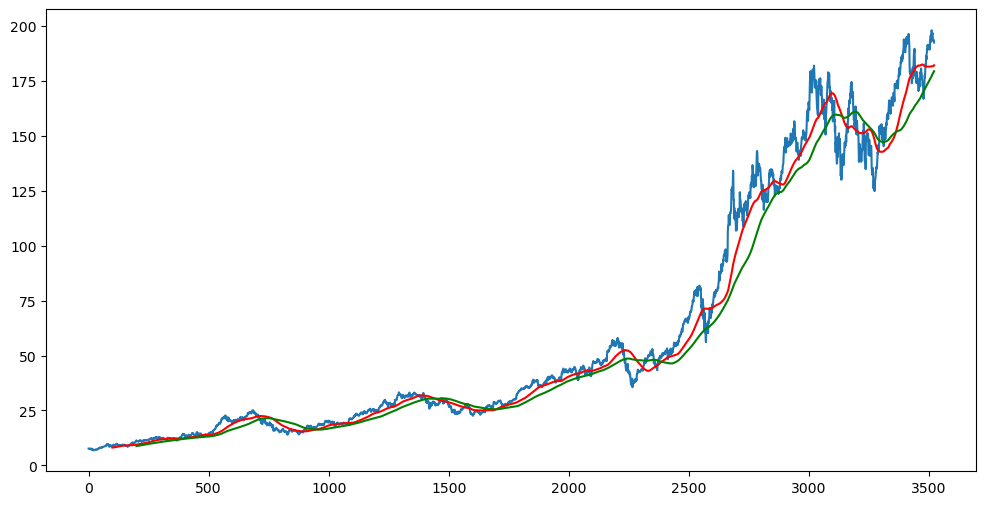

In [244]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [245]:
df.shape

(3522, 7)

In [210]:
# Spliting data into training and Teasting

In [211]:
data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_traning.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [212]:
data_traning.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [213]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [215]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [217]:
data_traning.shape

(2465, 1)

In [219]:
x_train = []
y_train = []

# Loop starting from the 100th index of data_traning_array
for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100: i])
    y_train.append(data_traning_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [119]:
# ML Model

In [120]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [220]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary() 
model.fit(x_train, y_train, epochs=50)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_23 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_24 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_25 (LSTM)              (None, 120)              

In [224]:
model.save('keras_model.h5')

In [225]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [226]:
past_100_days = data_traning.tail(100)

In [227]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [228]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [229]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [230]:
input_data.shape

(1157, 1)

In [231]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [232]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [233]:
y_predicted = model.predict(x_test)

34/34 [==============================] - 2s 32ms/step


In [234]:
y_predicted.shape

(1057, 1)

In [235]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [236]:
y_predicted

array([[0.14508593],
       [0.14651719],
       [0.1479963 ],
       ...,
       [0.9041228 ],
       [0.8990474 ],
       [0.893957  ]], dtype=float32)

In [237]:
y_predicted.shape

(1057, 1)

In [238]:
y_predicted

array([[0.14508593],
       [0.14651719],
       [0.1479963 ],
       ...,
       [0.9041228 ],
       [0.8990474 ],
       [0.893957  ]], dtype=float32)

In [239]:
scaler.scale_

array([0.00646057])

In [240]:
scale_factor = 1/0.0299517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

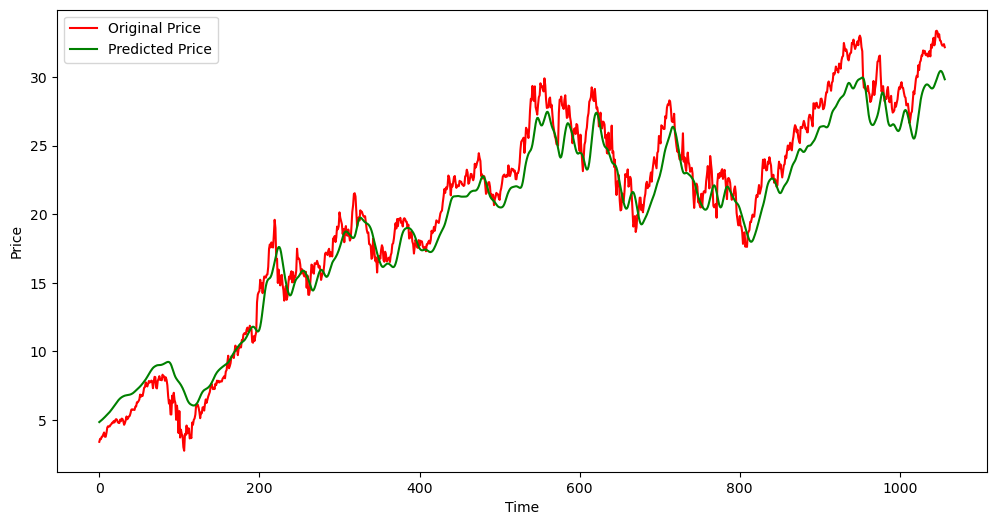

In [241]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'r', label = "Original Price")
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
# Hello EveryOne This is Created By : Harish Prasad Semwal